# Predicting Purchase Intent from Ad clicks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [23]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
x=dataset.iloc[:,:-1]
y=dataset[["Purchased"]]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
for i in range(1,20):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    print (i,dt1.score(x_train,y_train)-dt1.score(x_test,y_test))

1 -0.078125
2 0.006249999999999978
3 0.006249999999999978
4 0.018750000000000044
5 0.03437499999999993
6 0.08749999999999991
7 0.11875000000000002
8 0.12187500000000007
9 0.13124999999999998
10 0.13437500000000002
11 0.15312499999999996
12 0.15625
13 0.15625
14 0.15937499999999993
15 0.15937499999999993
16 0.15937499999999993
17 0.15937499999999993
18 0.15937499999999993
19 0.15937499999999993


In [17]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [18]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
dt.score(x_test,y_test)*100

91.25

In [20]:
dt.score(x_train,y_train)*100

91.875

In [22]:
dt.predict([[19,19000]])

c:\Users\Samata Samanta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
dt.predict([[50,20000]])

c:\Users\Samata Samanta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Visualization

### Visualizing the Dataset

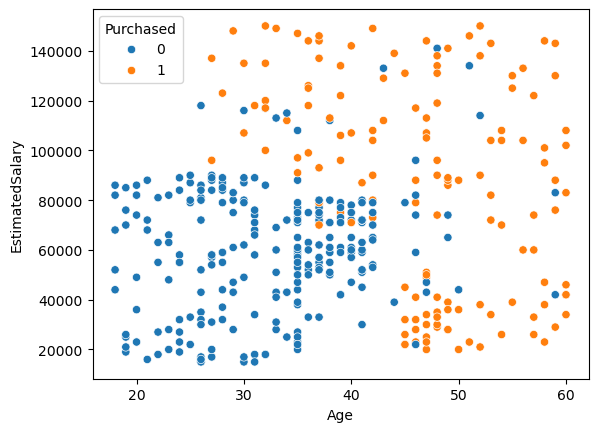

In [25]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

### Visualizing the Decision Tree

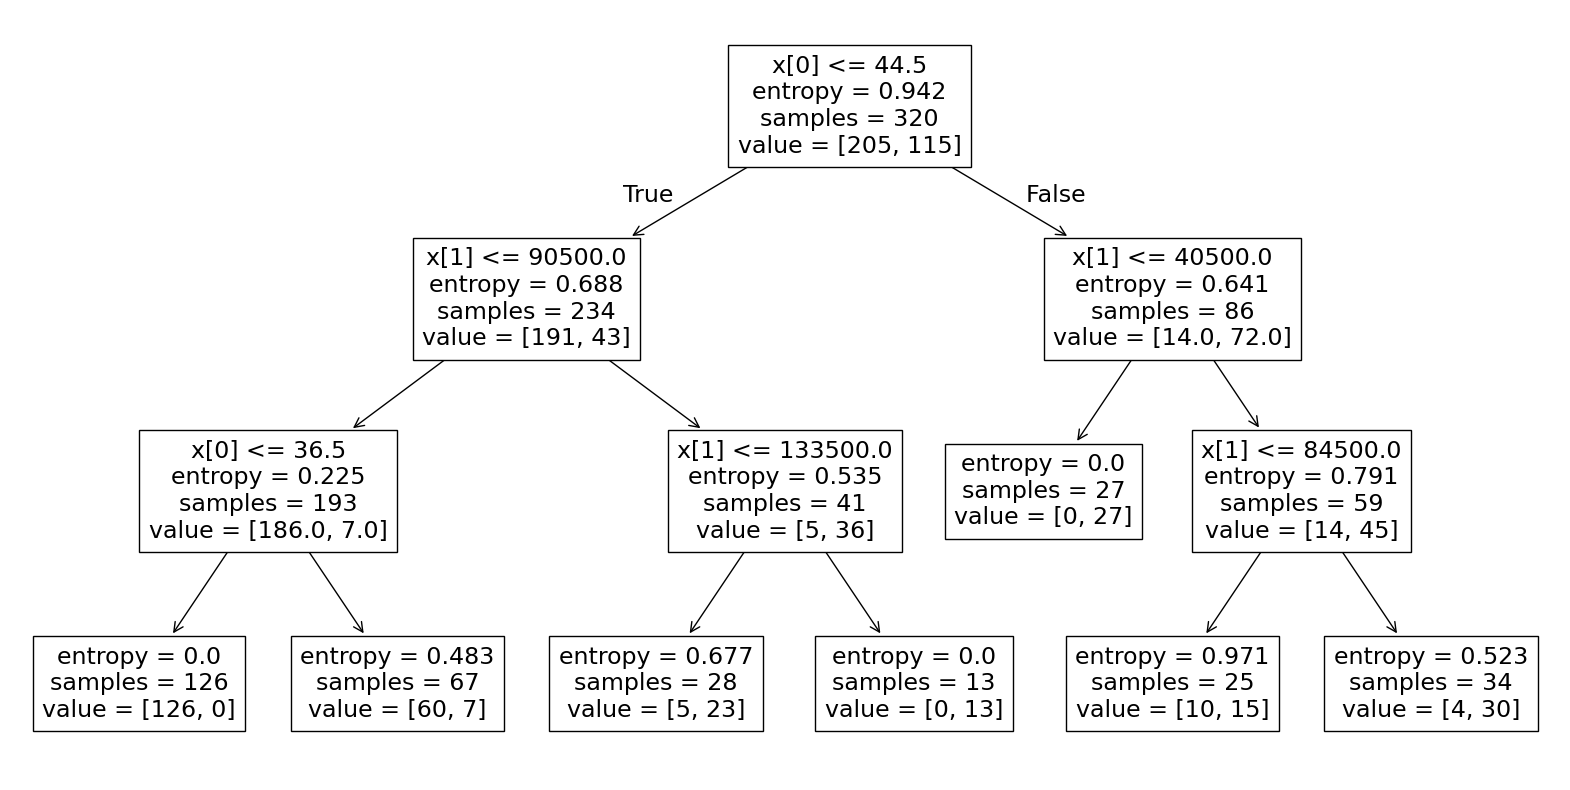

In [29]:
plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

In [31]:
from mlxtend.plotting import plot_decision_regions

### Visualizing 2D plot of the decision boundaries that the classifier creates based on input features x and labels y.

c:\Users\Samata Samanta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


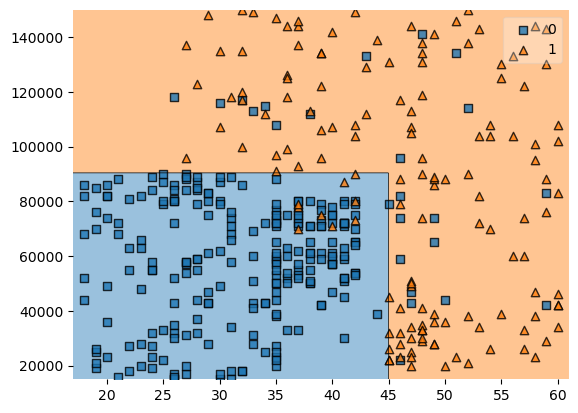

In [33]:
plot_decision_regions(x.to_numpy(),y.to_numpy().ravel(),clf=dt)
plt.show()